## 영화감독별 관객 평균

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("movie.csv", index_col=0)
df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004.1.1,스페인,0,0,"8,840",코미디,15세관람가
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004.1.9,미국,0,0,"1,263,200",액션,15세관람가
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004.1.16,한국,0,0,"1,513,000",코미디,12세관람가
3,말죽거리 잔혹사,유하,CJ ENM,2004.1.16,한국,0,0,"3,115,767",액션,15세관람가
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004.1.16,미국,0,0,"352,691",드라마,전체관람가
...,...,...,...,...,...,...,...,...,...,...
14995,발정난 미망인의 유혹,나카지마 타로,(주)영진크리에이티브,2020.12.31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14996,선샤인 패밀리,김태식,시네마 뉴원,2020.12.31,한국,26,"1,168,100",133,드라마,12세이상관람가
14997,숙모의 망사팬티 무삭제판,와카마츠 쇼군,(주)영진크리에이티브,2020.12.31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14998,와이프 렌탈 서비스 무삭제판,사이유키,(주)영진크리에이티브,2020.12.31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가


In [3]:
import datetime as dt

df['개봉일'] = pd.to_datetime(df['개봉일'])

In [4]:
df['개봉일'].dt.year

0        2004
1        2004
2        2004
3        2004
4        2004
         ... 
14995    2020
14996    2020
14997    2020
14998    2020
14999    2020
Name: 개봉일, Length: 15000, dtype: int64

In [5]:
df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004-01-01,스페인,0,0,"8,840",코미디,15세관람가
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004-01-09,미국,0,0,"1,263,200",액션,15세관람가
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004-01-16,한국,0,0,"1,513,000",코미디,12세관람가
3,말죽거리 잔혹사,유하,CJ ENM,2004-01-16,한국,0,0,"3,115,767",액션,15세관람가
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004-01-16,미국,0,0,"352,691",드라마,전체관람가
...,...,...,...,...,...,...,...,...,...,...
14995,발정난 미망인의 유혹,나카지마 타로,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14996,선샤인 패밀리,김태식,시네마 뉴원,2020-12-31,한국,26,"1,168,100",133,드라마,12세이상관람가
14997,숙모의 망사팬티 무삭제판,와카마츠 쇼군,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14998,와이프 렌탈 서비스 무삭제판,사이유키,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가


In [6]:
director = df['감독'].unique()
len(director)

7059

In [7]:
df['관객수'] = df['관객수'].str.replace(',', '').astype(int)
df.dtypes

영화명             object
감독              object
배급사             object
개봉일     datetime64[ns]
국적              object
스크린수            object
매출액             object
관객수              int64
장르              object
등급              object
dtype: object

In [8]:
fin = df.groupby('감독')['관객수'].mean()

In [9]:
fin

감독
A.K. 스트롬          17.0
BC 퍼트니            60.0
C. 토마스 하우웰         1.0
C.나가후쿠             1.0
D.J. 카루소      684588.0
                ...   
히즈엠티 선교회       52852.0
히토시 이시카와           1.0
힐데 반 미에그헴        601.0
힐러리 셰익스피어        286.0
힐러리안 뱅크스           1.0
Name: 관객수, Length: 7059, dtype: float64

In [10]:
type(fin)

pandas.core.series.Series

In [11]:
fin = fin.to_frame()

In [12]:
fin

,관객수
감독,
A.K. 스트롬,17.0
BC 퍼트니,60.0
C. 토마스 하우웰,1.0
C.나가후쿠,1.0
D.J. 카루소,684588.0
...,...
히즈엠티 선교회,52852.0
히토시 이시카와,1.0
힐데 반 미에그헴,601.0


In [13]:
fin.to_csv("director(2016~2018).csv")

---------------------------------------------------------------------------------------------

## 배급사 영화관객 평균

In [14]:
df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004-01-01,스페인,0,0,8840,코미디,15세관람가
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004-01-09,미국,0,0,1263200,액션,15세관람가
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004-01-16,한국,0,0,1513000,코미디,12세관람가
3,말죽거리 잔혹사,유하,CJ ENM,2004-01-16,한국,0,0,3115767,액션,15세관람가
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004-01-16,미국,0,0,352691,드라마,전체관람가
...,...,...,...,...,...,...,...,...,...,...
14995,발정난 미망인의 유혹,나카지마 타로,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14996,선샤인 패밀리,김태식,시네마 뉴원,2020-12-31,한국,26,"1,168,100",133,드라마,12세이상관람가
14997,숙모의 망사팬티 무삭제판,와카마츠 쇼군,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가
14998,와이프 렌탈 서비스 무삭제판,사이유키,(주)영진크리에이티브,2020-12-31,일본,1,"6,000",1,멜로/로맨스,청소년관람불가


In [15]:
len(df['배급사'].unique())

1158

In [16]:
distributor = df.groupby('배급사')['관객수'].mean()
distributor = distributor.to_frame()
distributor

,관객수
배급사,
'탁주'조합,111.000000
(사)독립영화전용관 확대를 위한 시민모임,479.000000
"(사)필레마,필름포럼,홀리가든",2180.000000
"(사)한국독립영화협회,아트플러스시네마네트워크",2565.000000
(유)마스엔터테인먼트코리아,9193.666667
...,...
홀리가든,889.200000
"홀리가든,(주)오렌지옐로우하임",1013.500000
"홀리가든,불안한외출배급위원회",1958.000000


In [17]:
distributor.to_csv("distributor(2016~2018).csv")

------------------------------------------------------------------------

## 전국 영화 스크린 수 

In [18]:
len(df['영화명'].unique())

14754

In [19]:
screen = df[['영화명', '스크린수']]
screen

,영화명,스크린수
0,스페니쉬 아파트먼트,0
1,라스트 사무라이,0
2,내사랑 싸가지,0
3,말죽거리 잔혹사,0
4,브라더 베어,0
...,...,...
14995,발정난 미망인의 유혹,1
14996,선샤인 패밀리,26
14997,숙모의 망사팬티 무삭제판,1
14998,와이프 렌탈 서비스 무삭제판,1


--------------------------------------------------------------

In [20]:
# 2019년도 만명 넘은 관객수로 영화명 리스트 추출 
import pandas as pd
movie = pd.read_csv('movie(2019).csv', index_col=0)

movie['관객수'] = movie['관객수'].str.replace(',','').astype(int)
limit_people = movie['관객수']>=10000


movie = movie[limit_people]

In [21]:
movie

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급,연도
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",2019.1.1,한국,530,"1,746,373,250",197134,액션,청소년관람불가,2019
3,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",2019.1.3,러시아,112,"166,459,680",19221,드라마,15세이상관람가,2019
9,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,2019.1.3,미국,"1,453","13,877,029,723",1754375,애니메이션,전체관람가,2019
39,그린 북,피터 패럴리,CGV아트하우스,2019.1.9,미국,398,"3,603,268,560",429733,드라마,12세이상관람가,2019
40,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온",2019.1.9,한국,"1,041","16,293,580,567",1901684,판타지,15세이상관람가,2019
...,...,...,...,...,...,...,...,...,...,...,...
1755,프린스 코기,벤 스타센,(주)이수C&E,2019.12.24,벨기에,455,"1,525,167,980",203775,애니메이션,전체관람가,2019
1756,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",2019.12.25,미국,49,"98,887,120",12393,드라마,15세이상관람가,2019
1757,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,2019.12.26,미국,68,"316,162,730",38816,드라마,12세이상관람가,2019
1762,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,2019.12.26,한국,"1,198","16,502,543,020",2000490,사극,12세이상관람가,2019


In [22]:
movie['스크린수'] = movie['스크린수'].str.replace(',','').astype(int)

In [23]:
# 영화리스트 추출
movie_list = []
movie_list = movie['영화명']
movie_list

0                      언니
3                      레토
9       주먹왕 랄프 2: 인터넷 속으로
39                   그린 북
40                 내안의 그놈
              ...        
1755               프린스 코기
1756               와일드라이프
1757          고흐, 영원의 문에서
1762          천문: 하늘에 묻는다
1773                 미드웨이
Name: 영화명, Length: 296, dtype: object

In [24]:
movie.dtypes

영화명     object
감독      object
배급사     object
개봉일     object
국적      object
스크린수     int64
매출액     object
관객수      int64
장르      object
등급      object
연도       int64
dtype: object

In [25]:
# 감독 데이터
director = pd.read_csv("director(2016~2018).csv", encoding=0)
director.head(5)

,감독,관객수
0,A.K. 스트롬,17.0
1,BC 퍼트니,60.0
2,C. 토마스 하우웰,1.0
3,C.나가후쿠,1.0
4,D.J. 카루소,684588.0


In [26]:
director.dtypes

감독      object
관객수    float64
dtype: object

In [27]:
# 배급사 데이터
distributor = pd.read_csv("distributor(2016~2018).csv", encoding=0)
distributor.head(5)

,배급사,관객수
0,'탁주'조합,111.000000
1,(사)독립영화전용관 확대를 위한 시민모임,479.000000
2,"(사)필레마,필름포럼,홀리가든",2180.000000
3,"(사)한국독립영화협회,아트플러스시네마네트워크",2565.000000
4,(유)마스엔터테인먼트코리아,9193.666667


In [28]:
distributor.dtypes

배급사     object
관객수    float64
dtype: object

In [29]:
# 영화명, 감독, 배급사 추출
df = movie[['영화명','감독','배급사']].reset_index(drop=True)
df

,영화명,감독,배급사
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온"
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)"
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사
3,그린 북,피터 패럴리,CGV아트하우스
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온"
...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티"
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트


In [30]:
real_data = pd.merge(df, director, how='left')
real_data

,영화명,감독,배급사,관객수
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",9.877950e+04
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",1.922100e+04
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,1.336279e+06
3,그린 북,피터 패럴리,CGV아트하우스,4.297330e+05
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온",5.942636e+05
...,...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E,6.971502e+05
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",1.239300e+04
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,3.217700e+04
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,1.705375e+06


In [31]:
real_data.isnull().sum()

영화명    0
감독     0
배급사    0
관객수    0
dtype: int64

In [32]:
test = pd.merge(df, distributor, how='left')
test

,영화명,감독,배급사,관객수
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",4.332549e+05
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",1.922100e+04
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,2.737354e+06
3,그린 북,피터 패럴리,CGV아트하우스,1.791500e+05
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온",1.901684e+06
...,...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E,1.141788e+05
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",1.282533e+04
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,2.244603e+04
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,1.514566e+06


In [33]:
test.isnull().sum()

영화명    0
감독     0
배급사    0
관객수    0
dtype: int64

In [34]:
##########################################################################

## 다시 전처리

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("movie.csv", encoding=0, index_col=0)
df.head(5)

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004.1.1,스페인,0,0,"8,840",코미디,15세관람가
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004.1.9,미국,0,0,"1,263,200",액션,15세관람가
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004.1.16,한국,0,0,"1,513,000",코미디,12세관람가
3,말죽거리 잔혹사,유하,CJ ENM,2004.1.16,한국,0,0,"3,115,767",액션,15세관람가
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004.1.16,미국,0,0,"352,691",드라마,전체관람가


In [37]:
df.dtypes

영화명     object
감독      object
배급사     object
개봉일     object
국적      object
스크린수    object
매출액     object
관객수     object
장르      object
등급      object
dtype: object

In [38]:
import datetime as dt

df['관객수'] = df['관객수'].str.replace(',', '').astype(int)
df['스크린수'] = df['스크린수'].str.replace(',', '').astype(int)

df.dtypes

영화명     object
감독      object
배급사     object
개봉일     object
국적      object
스크린수     int64
매출액     object
관객수      int64
장르      object
등급      object
dtype: object

In [39]:
import datetime as dt

df['개봉일'] = pd.to_datetime(df['개봉일'])
df['연도'] = df['개봉일'].dt.year
df.head(5)

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급,연도
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004-01-01,스페인,0,0,8840,코미디,15세관람가,2004
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004-01-09,미국,0,0,1263200,액션,15세관람가,2004
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004-01-16,한국,0,0,1513000,코미디,12세관람가,2004
3,말죽거리 잔혹사,유하,CJ ENM,2004-01-16,한국,0,0,3115767,액션,15세관람가,2004
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004-01-16,미국,0,0,352691,드라마,전체관람가,2004


In [40]:
fin_director = df.groupby('감독')['관객수'].mean()
fin_director = pd.DataFrame(fin_director)
fin_director.head(5)

,관객수
감독,
A.K. 스트롬,17.0
BC 퍼트니,60.0
C. 토마스 하우웰,1.0
C.나가후쿠,1.0
D.J. 카루소,684588.0


In [41]:
fin_director = fin_director.rename(columns={'관객수':'감독_관객수'})
fin_director

,감독_관객수
감독,
A.K. 스트롬,17.0
BC 퍼트니,60.0
C. 토마스 하우웰,1.0
C.나가후쿠,1.0
D.J. 카루소,684588.0
...,...
히즈엠티 선교회,52852.0
히토시 이시카와,1.0
힐데 반 미에그헴,601.0


In [42]:
fin_distributor = df.groupby('배급사')['관객수'].mean()
fin_distributor = pd.DataFrame(fin_distributor)
fin_distributor = fin_distributor.rename(columns={'관객수':'배급사_관객수'})
fin_distributor.head(5)

,배급사_관객수
배급사,
'탁주'조합,111.000000
(사)독립영화전용관 확대를 위한 시민모임,479.000000
"(사)필레마,필름포럼,홀리가든",2180.000000
"(사)한국독립영화협회,아트플러스시네마네트워크",2565.000000
(유)마스엔터테인먼트코리아,9193.666667


In [43]:
fin_director.to_csv("fin_director.csv", encoding=0)

In [44]:
fin_distributor.to_csv("fin_distributor.csv", encoding=0)

In [45]:
df_director = pd.read_csv("fin_director.csv")
df_distributor = pd.read_csv("fin_distributor.csv")

In [46]:
# 원본데이터에서 영화명, 감독, 배급사만 추출
test_df = pd.read_csv("movie(2019).csv", index_col=0)
test_df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급,연도
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",2019.1.1,한국,530,"1,746,373,250","197,134",액션,청소년관람불가,2019
1,데드풀 2: 순한맛,데이빗 레이치,이십세기폭스코리아(주),2019.1.3,미국,17,"44,553,400","5,191",액션,12세이상관람가,2019
2,레인보우: 나의 사랑,파올로 타비아니,(주)마노엔터테인먼트,2019.1.3,이탈리아,20,"12,440,350","1,656",멜로/로맨스,12세이상관람가,2019
3,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",2019.1.3,러시아,112,"166,459,680","19,221",드라마,15세이상관람가,2019
4,마션 인베이션,해스래프 둘룰,레이크엔터테인먼트,2019.1.3,영국,5,"5,000",5,SF,12세이상관람가,2019
...,...,...,...,...,...,...,...,...,...,...,...
1770,음란한 그녀의 색스런 이야기,박은석,(주)씨맥스커뮤니케이션즈,2019.12.27,한국,1,"1,000",1,드라마,청소년관람불가,2019
1771,정사 그녀의 언니,이가온,(주)케이알씨지,2019.12.27,한국,20,"1,183,000",244,멜로/로맨스,청소년관람불가,2019
1772,직장 연애사,윤준세,(주)영진크리에이티브,2019.12.27,한국,20,"109,000",20,멜로/로맨스,청소년관람불가,2019
1773,미드웨이,롤랜드 에머리히,(주)누리픽쳐스,2019.12.31,미국,842,"8,211,133,530","955,294",액션,15세이상관람가,2019


In [47]:
# 2019년도 만명 넘은 관객수로 영화명 리스트 추출 
test_df['관객수'] = test_df['관객수'].str.replace(',','').astype(int)
limit_people = test_df['관객수']>=10000


test_df = test_df[limit_people]

In [48]:
tdf = test_df[['영화명','감독','배급사','스크린수','국적','관객수','장르','개봉일']].reset_index(drop=True)
tdf.head(5)

,영화명,감독,배급사,스크린수,국적,관객수,장르,개봉일
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",530,한국,197134,액션,2019.1.1
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",112,러시아,19221,드라마,2019.1.3
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,"1,453",미국,1754375,애니메이션,2019.1.3
3,그린 북,피터 패럴리,CGV아트하우스,398,미국,429733,드라마,2019.1.9
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온","1,041",한국,1901684,판타지,2019.1.9


In [49]:
test = pd.merge(tdf, df_director, how='left')
test

,영화명,감독,배급사,스크린수,국적,관객수,장르,개봉일,감독_관객수
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",530,한국,197134,액션,2019.1.1,9.877950e+04
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",112,러시아,19221,드라마,2019.1.3,1.922100e+04
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,"1,453",미국,1754375,애니메이션,2019.1.3,1.336279e+06
3,그린 북,피터 패럴리,CGV아트하우스,398,미국,429733,드라마,2019.1.9,4.297330e+05
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온","1,041",한국,1901684,판타지,2019.1.9,5.942636e+05
...,...,...,...,...,...,...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E,455,벨기에,203775,애니메이션,2019.12.24,6.971502e+05
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",49,미국,12393,드라마,2019.12.25,1.239300e+04
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,68,미국,38816,드라마,2019.12.26,3.217700e+04
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,"1,198",한국,2000490,사극,2019.12.26,1.705375e+06


In [50]:
import datetime as dt
test['개봉일'] = pd.to_datetime(test['개봉일'])

In [51]:
test = pd.merge(test, df_distributor, how='left')
test

,영화명,감독,배급사,스크린수,국적,관객수,장르,개봉일,감독_관객수,배급사_관객수
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",530,한국,197134,액션,2019-01-01,9.877950e+04,4.332549e+05
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",112,러시아,19221,드라마,2019-01-03,1.922100e+04,1.922100e+04
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,"1,453",미국,1754375,애니메이션,2019-01-03,1.336279e+06,2.737354e+06
3,그린 북,피터 패럴리,CGV아트하우스,398,미국,429733,드라마,2019-01-09,4.297330e+05,1.791500e+05
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온","1,041",한국,1901684,판타지,2019-01-09,5.942636e+05,1.901684e+06
...,...,...,...,...,...,...,...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E,455,벨기에,203775,애니메이션,2019-12-24,6.971502e+05,1.141788e+05
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",49,미국,12393,드라마,2019-12-25,1.239300e+04,1.282533e+04
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,68,미국,38816,드라마,2019-12-26,3.217700e+04,2.244603e+04
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,"1,198",한국,2000490,사극,2019-12-26,1.705375e+06,1.514566e+06


In [52]:
test.isnull().sum()

영화명        0
감독         0
배급사        0
스크린수       0
국적         0
관객수        0
장르         0
개봉일        0
감독_관객수     0
배급사_관객수    0
dtype: int64

In [53]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote # 한글url 변경 방지 
import pandas as pd 


base_url ='https://movie.naver.com/movie/search/result.naver?query='

movies= test['영화명'].values.tolist()
print(len(movies))

url_list = []
score_list = []


for movie in movies:
  query = quote(movie)
  url = base_url + query + '&section=all'
  url_list += [url]

for url in url_list:

    try:  
        search_url = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(search_url, 'html.parser')
        score = soup.find('em', {'class':'num'}).get_text()
        score_list += [score]

    except AttributeError:
        score=0
        score_list +=[score]
print(score_list)

296
['5.53', '8.43', '8.62', '9.60', '8.18', '9.13', '9.15', '4.89', '8.80', '6.81', '5.99', '9.33', '7.91', '8.67', '7.41', '8.84', '8.51', '7.24', '9.60', '9.26', '5.98', '8.74', '8.70', '8.73', '8.76', '8.27', '6.32', '8.24', '9.10', '9.11', '8.44', '8.16', '8.22', '7.33', '8.49', '7.33', '6.32', '6.74', '8.75', '6.40', '8.69', '8.44', '8.60', '7.90', '4.47', '9.26', '3.90', '9.14', '8.66', '6.75', '8.06', '2.15', '8.83', '8.66', '7.30', '7.88', '7.75', '8.33', '7.42', '5.88', '3.91', '8.49', '7.06', '7.97', '0.00', '8.93', '5.85', '6.70', '8.14', '8.67', '4.60', '9.34', '7.27', '5.81', '9.84', '8.46', '4.93', '6.48', '9.00', '6.80', '8.36', '8.42', '7.51', '7.79', '8.00', '5.17', '6.77', '6.80', '5.77', '8.79', '9.38', '9.29', '8.35', '8.95', '9.05', '8.55', '7.98', '6.80', '9.05', '5.69', '8.09', '8.45', 0, '7.22', '8.91', '7.87', '9.29', '9.33', '6.80', '9.05', '8.14', '4.74', '5.97', '9.38', '2.38', '7.15', '6.92', '8.78', '4.98', '8.48', '6.69', '6.41', '8.05', '5.94', '7.74', 

In [54]:
score_list = pd.DataFrame(score_list)

#test = pd.merge(test, score_list, how='left')
test['평점'] = score_list
test

,영화명,감독,배급사,스크린수,국적,관객수,장르,개봉일,감독_관객수,배급사_관객수,평점
0,언니,임경택,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",530,한국,197134,액션,2019-01-01,9.877950e+04,4.332549e+05,5.53
1,레토,키릴 세레브렌니코프,"(주)엣나인필름,플레이리스트(주)",112,러시아,19221,드라마,2019-01-03,1.922100e+04,1.922100e+04,8.43
2,주먹왕 랄프 2: 인터넷 속으로,리치 무어,월트디즈니컴퍼니코리아 유한책임회사,"1,453",미국,1754375,애니메이션,2019-01-03,1.336279e+06,2.737354e+06,8.62
3,그린 북,피터 패럴리,CGV아트하우스,398,미국,429733,드라마,2019-01-09,4.297330e+05,1.791500e+05,9.60
4,내안의 그놈,강효진,"(주)메리크리스마스,TCO(주)더콘텐츠온","1,041",한국,1901684,판타지,2019-01-09,5.942636e+05,1.901684e+06,8.18
...,...,...,...,...,...,...,...,...,...,...,...
291,프린스 코기,벤 스타센,(주)이수C&E,455,벨기에,203775,애니메이션,2019-12-24,6.971502e+05,1.141788e+05,7.32
292,와일드라이프,폴 다노,"그린나래미디어(주),(주)키다리이엔티",49,미국,12393,드라마,2019-12-25,1.239300e+04,1.282533e+04,8.33
293,"고흐, 영원의 문에서",줄리언 슈나벨,(주)팝엔터테인먼트,68,미국,38816,드라마,2019-12-26,3.217700e+04,2.244603e+04,8.42
294,천문: 하늘에 묻는다,허진호,롯데컬처웍스(주)롯데엔터테인먼트,"1,198",한국,2000490,사극,2019-12-26,1.705375e+06,1.514566e+06,8.81


In [55]:

# isin()는 DataFrame의 열 객체.isin(추출 값의 리스트)의 형태 
# dummy variable 


# pd.get_dummies(test['국적'],prefix='Nation_Dummy')
# test= pd.concat([test,pd.get_dummies(test['국적'],prefix='Nation_Dummy')],axis=1)
pd.get_dummies(test['장르'],prefix='Genre_Dummy')
test=pd.concat([test,pd.get_dummies(test['장르'],prefix='Genre_Dummy')],axis=1)

In [56]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 13 19:05:25 2017
@author: User
"""


import pandas as pd
import json
import os
import re
import numpy as np
from bs4 import BeautifulSoup
import requests
from pandas import Series, DataFrame
import time
from datetime import datetime, timedelta

Movies= test['영화명']
date = test['개봉일']
date = pd.DataFrame(date)
date['sdate'] = date['개봉일'] + timedelta(days=-7)
date = date.rename(columns={'개봉일':'edate'})
date['sdate'] = date['sdate'].astype(str)
date['edate'] = date['edate'].astype(str)

a = date['sdate'].values.tolist()
b=[]
for i in a:
    c = i.replace("-",".")
    b.append(c)

date['sdate'] = b

d= date['edate'].values.tolist()
e=[]
for i in d:
    f = i.replace("-",".")
    e.append(f)
date['edate'] = e

def URLmaker(query,sdate,edate):
    try:
        base_url = 'https://search.naver.com/search.naver?where=news&query={}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={}&de={}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20211026to20211126&is_sug_officeid=0'+'&start='
        encoded_query=requests.utils.quote(query, encoding='MS949')     
        base_url = base_url.format(encoded_query, sdate, edate)
    except:
        print(i)
        pass
    return base_url

#앞에 만든 함수에 검색과 기간을 넣어서 최종 url 생성
FinalUrl=[]
for i in range(len(Movies)):
    url=URLmaker(Movies[i], date['sdate'][i], date['edate'][i])
    FinalUrl.append(url)

main_count =0
sub_count =0 
news_count = []

for url in FinalUrl: 
    main_count =0
    sub_count =0 
    for page in range(1, 100, 10):
        new_url = requests.get(url+str(page)+"&refresh_start=0", headers={'User-Agent': 'Mozilla/5.0'}).text
        html = BeautifulSoup(new_url, 'html.parser')
        articles = html.select('.list_news > li')
         
        
  #Each Page
        for article in articles:
            
            main_new = article.find_all('a', {'class':'info press'})
            sub_new = article.find_all('cite', {'class':'sub_txt press'})
            main_count += len(main_new)
            sub_count += len(sub_new)
            new_count = main_count+sub_count
    news_count.append(new_count)
    
print(news_count)

[180, 79, 137, 137, 173, 175, 106, 42, 54, 146, 92, 148, 105, 77, 150, 43, 199, 40, 131, 172, 199, 90, 174, 62, 50, 41, 170, 16, 156, 22, 1, 129, 20, 77, 12, 182, 18, 39, 96, 55, 36, 156, 87, 102, 171, 45, 180, 109, 162, 127, 133, 133, 50, 11, 55, 119, 23, 153, 182, 225, 154, 42, 14, 33, 53, 136, 165, 179, 148, 79, 1, 158, 181, 159, 39, 108, 59, 1, 53, 134, 184, 146, 57, 27, 139, 193, 49, 142, 37, 145, 133, 141, 38, 176, 44, 24, 49, 49, 25, 155, 157, 36, 12, 137, 203, 185, 59, 1, 56, 197, 136, 142, 180, 168, 14, 14, 131, 21, 192, 139, 139, 12, 154, 183, 25, 15, 102, 165, 54, 92, 32, 177, 89, 107, 41, 191, 29, 85, 179, 125, 176, 137, 81, 40, 175, 184, 49, 171, 43, 74, 141, 132, 41, 39, 15, 103, 49, 137, 90, 59, 38, 145, 113, 82, 161, 186, 166, 94, 187, 146, 70, 81, 170, 97, 194, 33, 63, 21, 198, 205, 53, 13, 181, 1, 180, 11, 175, 165, 165, 73, 19, 151, 169, 85, 142, 151, 85, 76, 76, 44, 168, 163, 46, 173, 28, 101, 127, 47, 31, 150, 53, 123, 63, 162, 138, 219, 172, 156, 156, 11, 154, 15,

In [57]:
test['네이버 기사수'] = news_count

In [58]:
test['평점'] = test['평점'].astype(float)
test['스크린수'] = test['스크린수'].str.replace(',', '').astype(int)
test.

영화명                           object
감독                            object
배급사                           object
스크린수                           int64
국적                            object
관객수                            int64
장르                            object
개봉일                   datetime64[ns]
감독_관객수                       float64
배급사_관객수                      float64
평점                           float64
Genre_Dummy_SF                 uint8
Genre_Dummy_가족                 uint8
Genre_Dummy_공연                 uint8
Genre_Dummy_공포(호러)             uint8
Genre_Dummy_기타                 uint8
Genre_Dummy_다큐멘터리              uint8
Genre_Dummy_드라마                uint8
Genre_Dummy_멜로/로맨스             uint8
Genre_Dummy_뮤지컬                uint8
Genre_Dummy_미스터리               uint8
Genre_Dummy_범죄                 uint8
Genre_Dummy_사극                 uint8
Genre_Dummy_스릴러                uint8
Genre_Dummy_애니메이션              uint8
Genre_Dummy_액션                 uint8
Genre_Dummy_어드벤처               uint8
G

In [95]:
y_data= test['관객수']
x_data = test.drop(['관객수','감독','배급사','영화명','국적','장르'],axis=1)
movie_data = pd.concat((x_data, y_data), 1)


movie_data.dtypes

/var/folders/zn/_5n2919s78x1g_3ymlgm22_00000gn/T/ipykernel_30754/3762386480.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  movie_data = pd.concat((x_data, y_data), 1)


스크린수                           int64
개봉일                   datetime64[ns]
감독_관객수                       float64
배급사_관객수                      float64
평점                           float64
Genre_Dummy_SF                 uint8
Genre_Dummy_가족                 uint8
Genre_Dummy_공연                 uint8
Genre_Dummy_공포(호러)             uint8
Genre_Dummy_기타                 uint8
Genre_Dummy_다큐멘터리              uint8
Genre_Dummy_드라마                uint8
Genre_Dummy_멜로/로맨스             uint8
Genre_Dummy_뮤지컬                uint8
Genre_Dummy_미스터리               uint8
Genre_Dummy_범죄                 uint8
Genre_Dummy_사극                 uint8
Genre_Dummy_스릴러                uint8
Genre_Dummy_애니메이션              uint8
Genre_Dummy_액션                 uint8
Genre_Dummy_어드벤처               uint8
Genre_Dummy_전쟁                 uint8
Genre_Dummy_코미디                uint8
Genre_Dummy_판타지                uint8
네이버 기사수                        int64
관객수                            int64
dtype: object

In [60]:
def genre_change(i):
    if i == '드라마' or i == '멜로/로맨스':
        return 'drama_romance'
    elif i == '전쟁' or i == '액션':
        return 'war_action'
    elif i == '공포(호러)' or i == '미스터리':
        return 'horror_mystery'
    elif i == '범죄' or i == '스릴러':
        return 'crime_thriller'
    elif i == 'SF' or i == '판타지' or i == '어드벤처':
        return 'SF_fantasy_adventure'
    elif i == '애니메이션' or i == '가족':
        return 'family_animation'
    elif i == '코미디':
        return 'comedy'
    elif i == '다큐멘터리':
        return 'documentary'
    elif i == '공연' or i == '뮤지컬':
        return 'performance_musical'
    elif i == '사극' or i == '서부극(웨스턴)':
        return 'historical'
    else:
        return i
    
test["장르"] = test["장르"].apply(genre_change)

/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


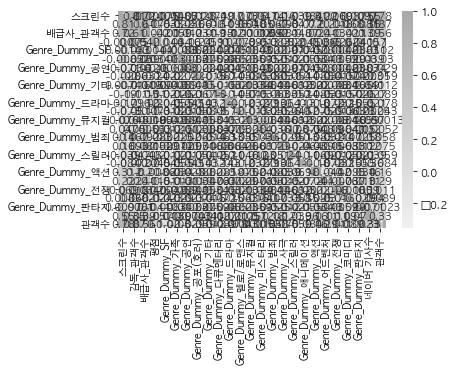

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

cmap = sns.light_palette("darkgray", as_cmap = True)   #상관행렬 시각화 
sns.heatmap(movie_data.corr(), annot = True, cmap = cmap)
plt.show()

In [62]:
movie_data.head()

,스크린수,개봉일,감독_관객수,배급사_관객수,평점,Genre_Dummy_SF,Genre_Dummy_가족,Genre_Dummy_공연,Genre_Dummy_공포(호러),Genre_Dummy_기타,...,Genre_Dummy_사극,Genre_Dummy_스릴러,Genre_Dummy_애니메이션,Genre_Dummy_액션,Genre_Dummy_어드벤처,Genre_Dummy_전쟁,Genre_Dummy_코미디,Genre_Dummy_판타지,네이버 기사수,관객수
0,530,2019-01-01,9.877950e+04,4.332549e+05,5.53,0,0,0,0,0,...,0,0,0,1,0,0,0,0,180,197134
1,112,2019-01-03,1.922100e+04,1.922100e+04,8.43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,79,19221
2,1453,2019-01-03,1.336279e+06,2.737354e+06,8.62,0,0,0,0,0,...,0,0,1,0,0,0,0,0,137,1754375
3,398,2019-01-09,4.297330e+05,1.791500e+05,9.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,137,429733
4,1041,2019-01-09,5.942636e+05,1.901684e+06,8.18,0,0,0,0,0,...,0,0,0,0,0,0,0,1,173,1901684


In [63]:
# sns.pairplot(movie_data) # 변수끼리 산점도 시각화 
# plt.show()

/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

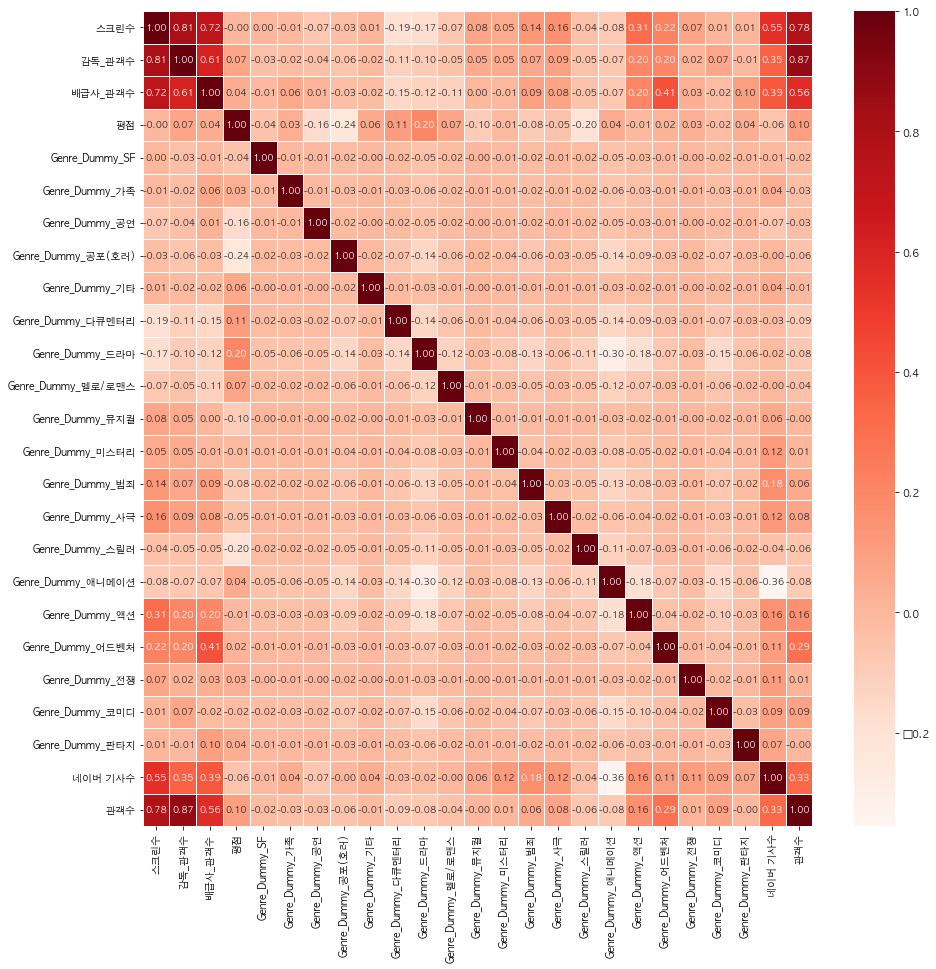

In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import rcParams

plt.rc('font', family='AppleGothic')

plt.figure(figsize=(15,15)) # 히트맵 
sns.heatmap(data = movie_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds',annot_kws={"size":9})


In [65]:
# 상수항 추가
# train test set 분리
import statsmodels.api as sm

movie_data = sm.add_constant(movie_data, has_constant = "add")
movie_data.head()

from sklearn.model_selection import train_test_split
feature_columns = list(movie_data.columns.difference(['관객수','개봉일']))
X = movie_data[feature_columns]
y = movie_data.관객수
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
movie_data.head()


,const,스크린수,개봉일,감독_관객수,배급사_관객수,평점,Genre_Dummy_SF,Genre_Dummy_가족,Genre_Dummy_공연,Genre_Dummy_공포(호러),...,Genre_Dummy_사극,Genre_Dummy_스릴러,Genre_Dummy_애니메이션,Genre_Dummy_액션,Genre_Dummy_어드벤처,Genre_Dummy_전쟁,Genre_Dummy_코미디,Genre_Dummy_판타지,네이버 기사수,관객수
0,1.0,530,2019-01-01,9.877950e+04,4.332549e+05,5.53,0,0,0,0,...,0,0,0,1,0,0,0,0,180,197134
1,1.0,112,2019-01-03,1.922100e+04,1.922100e+04,8.43,0,0,0,0,...,0,0,0,0,0,0,0,0,79,19221
2,1.0,1453,2019-01-03,1.336279e+06,2.737354e+06,8.62,0,0,0,0,...,0,0,1,0,0,0,0,0,137,1754375
3,1.0,398,2019-01-09,4.297330e+05,1.791500e+05,9.60,0,0,0,0,...,0,0,0,0,0,0,0,0,137,429733
4,1.0,1041,2019-01-09,5.942636e+05,1.901684e+06,8.18,0,0,0,0,...,0,0,0,0,0,0,0,1,173,1901684


In [66]:
full_model = sm.OLS(train_y, train_x)

fitted_full_model = full_model.fit()


In [67]:
# train summary
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    관객수   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     61.66
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           7.60e-73
Time:                        17:11:19   Log-Likelihood:                -3084.5
No. Observations:                 207   AIC:                             6215.
Df Residuals:                     184   BIC:                             6292.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Genre_Dummy_SF     -3.781e+04   5.19e+05     -0.073      0.942   -1.06e+06    9.86e+05
Genre_Dummy_가족      4.283e+04   7.28e+05      0.059      0.953   -1.39e+06    1.48e+06
Genre_Dummy_공연      4.388e+05   5.34e+05      0.822      0.412   -6.15e+05    1.49e+06
Genre_Dummy_공포(호러) -1.007e+05   2.07e+05     -0.487      0.627   -5.08e+05    3.07e+05
Genre_Dummy_기타     -5.894e-08   2.37e-08     -2.483      0.014   -1.06e-07   -1.21e-08
Genre_Dummy_다큐멘터리   2.636e+04   2.33e+05      0.113      0.910   -4.32e+05    4.85e+05
Genre_Dummy_드라마    -6.149e+04   1.64e+05     -0.375      0.708   -3.85e+05    2.62e+05
Genre_Dummy_멜로/로맨스 -1.826e+05   2.69e+05     -0.678      0.498   -7.14e+05    3.48e+05
Genre_Dummy_뮤지컬     -1.76e+06   7.36e+05     -2.390      0.018   -3.21e+06   -3.07e+05
Genre_Dummy_미스터리   -7.207e+05   3.41e+05     -2.116      0.036   -1.39e+06   -4.88e+04
Genre_Dummy_범죄     -1.839e+05   2.48e+05     -0.741      0.460   -6.74e+05    3.06e+05
Genre_Dummy_사극     -1.521e+05   4.34e+05     -0.351      0.726   -1.01e+06    7.04e+05
Genre_Dummy_스릴러     -1.25e+05   2.65e+05     -0.472      0.638   -6.48e+05    3.98e+05
Genre_Dummy_애니메이션  -2.079e+05   1.53e+05     -1.356      0.177    -5.1e+05    9.46e+04
Genre_Dummy_액션     -4.055e+04   1.89e+05     -0.215      0.830   -4.13e+05    3.32e+05
Genre_Dummy_어드벤처    3.179e+06   4.21e+05      7.552      0.000    2.35e+06    4.01e+06
Genre_Dummy_전쟁     -5.283e+05   7.36e+05     -0.718      0.474   -1.98e+06    9.24e+05
Genre_Dummy_코미디    -2.815e+05   2.12e+05     -1.325      0.187   -7.01e+05    1.38e+05
Genre_Dummy_판타지     2.892e+05   4.37e+05      0.661      0.509   -5.74e+05    1.15e+06
const              -4.061e+05   2.82e+05     -1.439      0.152   -9.63e+05    1.51e+05
감독_관객수                 0.9176      0.059     15.542      0.000       0.801       1.034
네이버 기사수            -1482.8388   1135.230     -1.306      0.193   -3722.580     756.903
배급사_관객수               -0.3535      0.092     -3.855      0.000      -0.534      -0.173
스크린수                1234.8202    246.956      5.000      0.000     747.590    1722.050
평점                  5.022e+04   3.53e+04      1.421      0.157   -1.95e+04     1.2e+05
==============================================================================
Omnibus:                      181.791   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7594.464
Skew:                           2.935   Prob(JB):                         0.00
Kurtosis:                      32.087   Cond. No.                     9.28e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.87e-30. This might indicate that there a

/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


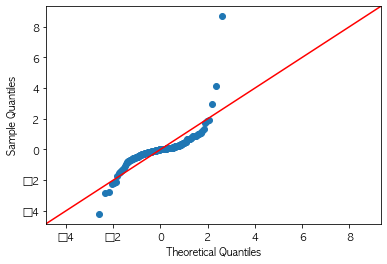

In [69]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(test_x)
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')
rcParams['figure.figsize'] = 30,20

In [ ]:
test_y-pred_y

123   -4.275940e+05
129   -4.984515e+05
144   -6.401963e+05
62    -1.090334e+05
105    1.102239e+06
           ...     
259    5.023748e+04
38     6.054406e+05
220   -7.279341e+05
193   -4.576936e+05
56    -2.204377e+05
Length: 89, dtype: float64

/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongchangho/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


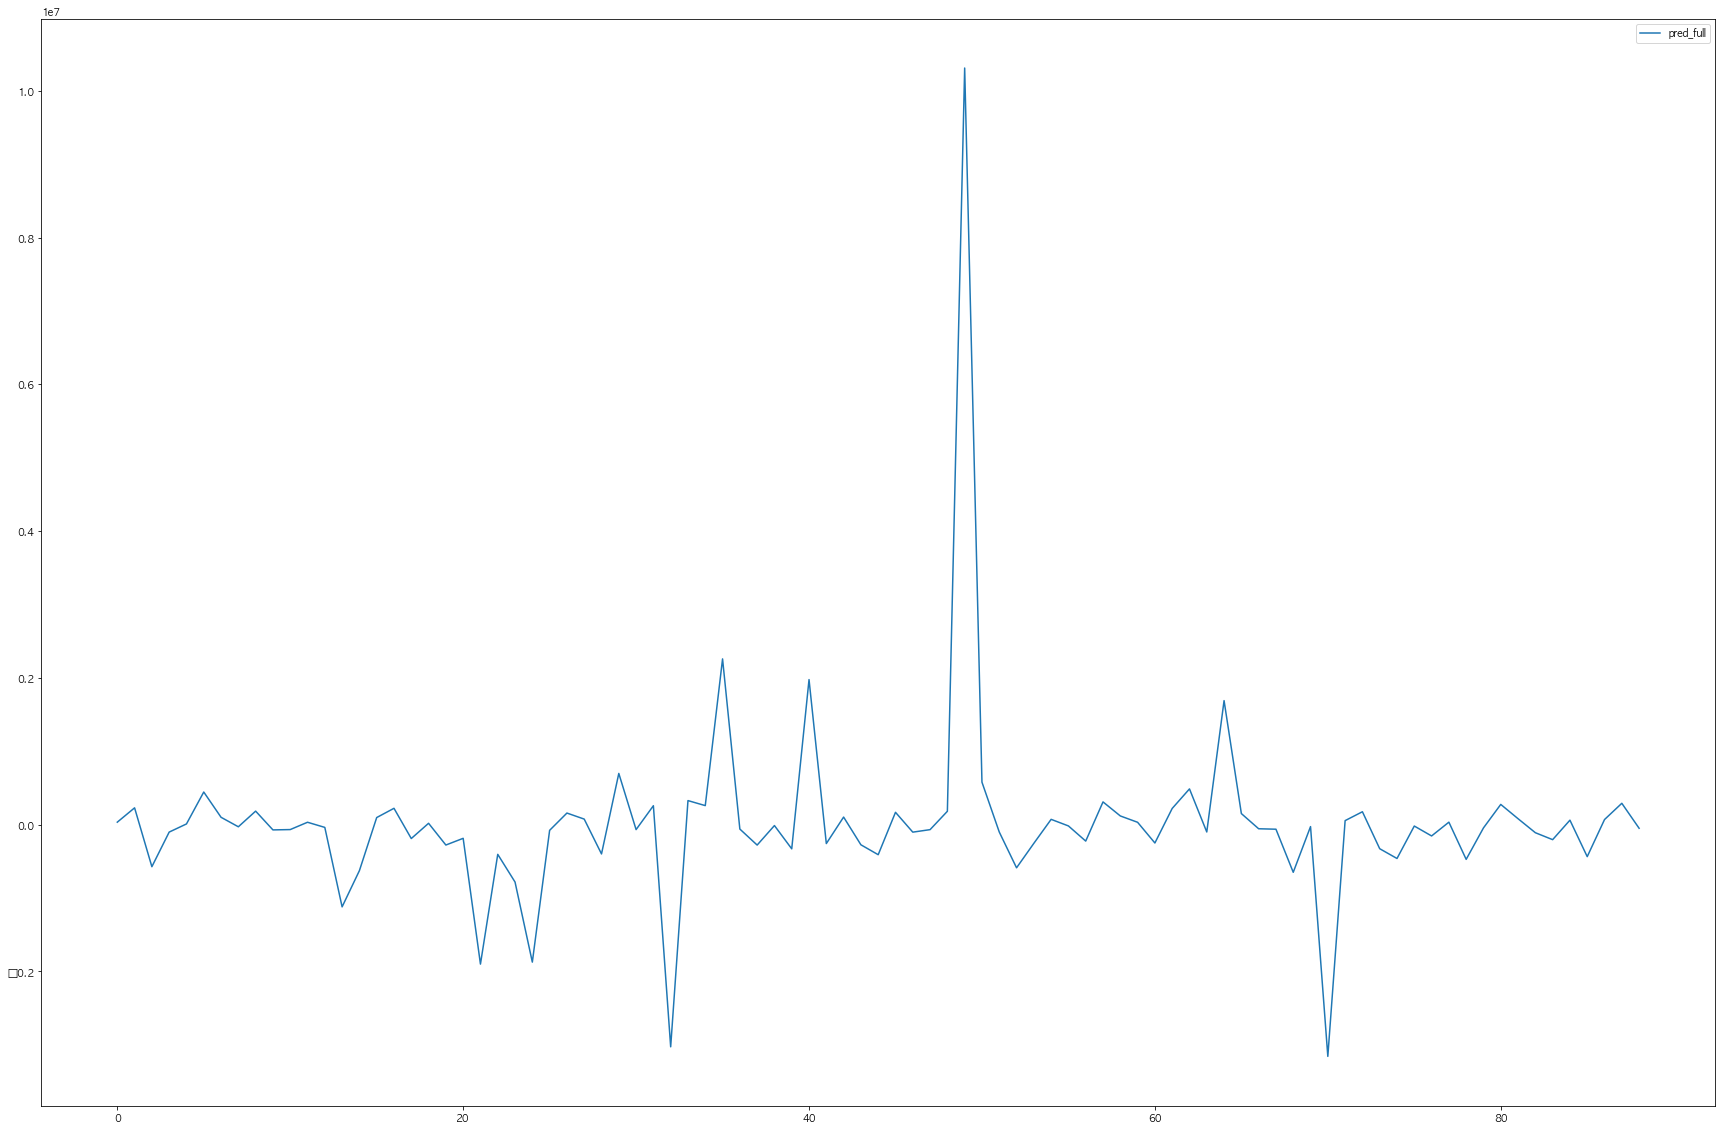

In [70]:
plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
rcParams['figure.figsize'] = 50,5
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true= test_y, y_pred= pred_y)

1707165232533.1577

In [73]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x169962490>, 'AIC': 6647.419344021478}


In [74]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x12f3b6a90>,
 'AIC': 6214.911160507023}

In [75]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  276 models on 2 predictors in 0.08632397651672363 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                            6219.329968
Name: 243, dtype: object


In [76]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")    

['Genre_Dummy_SF', 'Genre_Dummy_가족', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_공연', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_공포(호러)', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_기타', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_다큐멘터리', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_드라마', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_멜로/로맨스', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_뮤지컬', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_미스터리', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_범죄', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_사극', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_스릴러', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_애니메이션', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_액션', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_어드벤처', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_전쟁', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_코미디', 'const']
['Genre_Dummy_SF', 'Genre_Dummy_판타지', 'const']
['Genre_Dummy_SF', '감독_관객수', 'const']
['Genre_Dummy_SF', '네이버 기사수', 'const']
['Genre_Dummy_SF', '배급사_관객수', 'const']
['Genre_Dummy_SF', '스크린수', 'const

In [77]:
models.loc[4, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    관객수   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     335.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           6.02e-88
Time:                        17:12:16   Log-Likelihood:                -3094.0
No. Observations:                 207   AIC:                             6198.
Df Residuals:                     202   BIC:                             6215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Genre_Dummy_어드벤처  3.291e+06   4.31e+05      7.628      0.000    2.44e+06    4.14e+06
감독_관객수               0.9347      0.056     16.728      0.000       0.825       1.045
배급사_관객수             -0.3053      0.088     -3.461      0.001      -0.479      -0.131
스크린수               993.7189    201.482      4.932      0.000     596.441    1390.997
const            -2.467e+05   8.59e+04     -2.872      0.005   -4.16e+05   -7.74e+04
==============================================================================
Omnibus:                      166.853   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6126.174
Skew:                           2.598   Prob(JB):                         0.00
Kurtosis:                      29.140   Cond. No.                     1.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[4, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[4, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[4, "model"].mse_total))

full model Rsquared:  0.88056
full model AIC:  6214.91116
full model MSE:  4316197964922.43945
selected model Rsquared:  0.86904
selected model AIC:  6197.96983
selected model MSE:  4316197964922.43945


Text(0, 0.5, 'BIC')

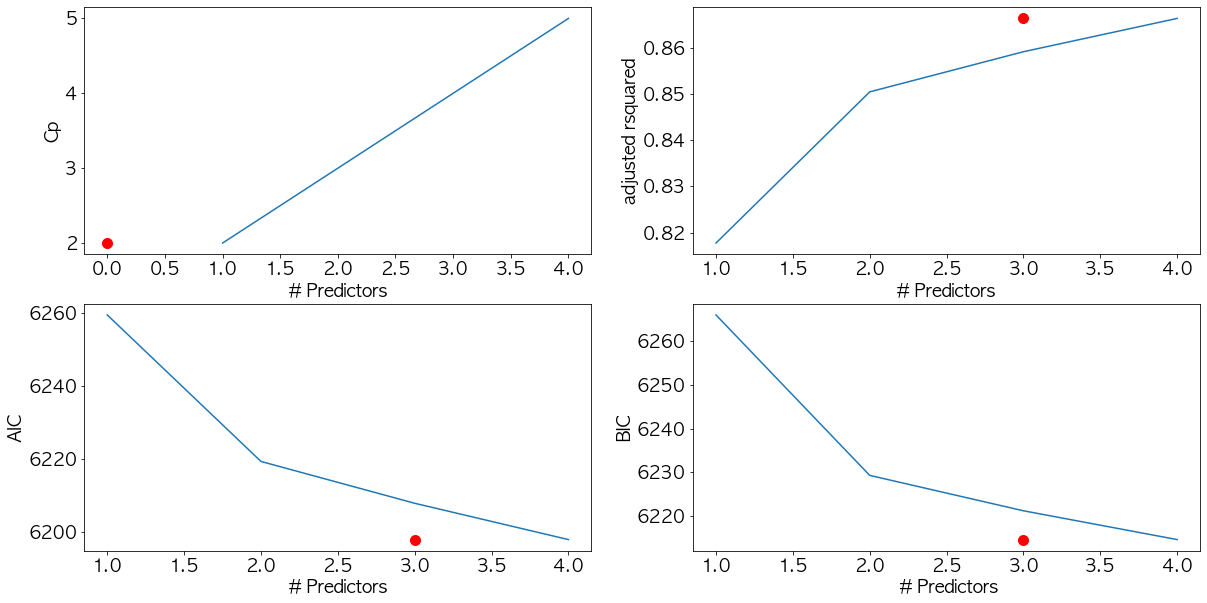

In [79]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

In [80]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [81]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [82]:
Forward_best_model = forward_model(X=train_x, y= train_y)
Forward_best_model.aic

Processed  24 models on 1 predictors in 0.011209964752197266
Selected predictors: ['감독_관객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a722d90>
Processed  23 models on 2 predictors in 0.011055946350097656
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x176e51bb0>
Processed  22 models on 3 predictors in 0.01695704460144043
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', '스크린수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a719670>
Processed  21 models on 4 predictors in 0.013545989990234375
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', '스크린수', '배급사_관객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a719760>
Processed  20 models on 5 predictors in 0.009889841079711914
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', '스크린수', '배급사_관객수', 'Genre_Dum

6191.848846231748

In [83]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [84]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [85]:
Backward_best_model = backward_model(X=train_x,y=train_y)
Backward_best_model.aic

Processed  24 models on 23 predictors in 0.013052940368652344
Selected predictors: ['Genre_Dummy_SF', 'Genre_Dummy_가족', 'Genre_Dummy_공연', 'Genre_Dummy_공포(호러)', 'Genre_Dummy_기타', 'Genre_Dummy_다큐멘터리', 'Genre_Dummy_드라마', 'Genre_Dummy_멜로/로맨스', 'Genre_Dummy_뮤지컬', 'Genre_Dummy_미스터리', 'Genre_Dummy_범죄', 'Genre_Dummy_사극', 'Genre_Dummy_스릴러', 'Genre_Dummy_애니메이션', 'Genre_Dummy_액션', 'Genre_Dummy_어드벤처', 'Genre_Dummy_전쟁', 'Genre_Dummy_코미디', 'Genre_Dummy_판타지', '감독_관객수', '배급사_관객수', '스크린수', '평점', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a722b80>
Processed  23 models on 22 predictors in 0.016625165939331055
Selected predictors: ['Genre_Dummy_SF', 'Genre_Dummy_가족', 'Genre_Dummy_공연', 'Genre_Dummy_공포(호러)', 'Genre_Dummy_기타', 'Genre_Dummy_다큐멘터리', 'Genre_Dummy_드라마', 'Genre_Dummy_멜로/로맨스', 'Genre_Dummy_뮤지컬', 'Genre_Dummy_미스터리', 'Genre_Dummy_범죄', 'Genre_Dummy_사극', 'Genre_Dummy_스릴러', 'Genre_Dummy_애니메이션', 'Genre_Dummy_액션', 'Genre_Dummy_어드벤처', 'Genre_Dummy_전쟁', 'Genr

6191.848846231748

In [86]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [87]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)
Stepwise_best_model.aic

Processed  24 models on 1 predictors in 0.010513067245483398
Selected predictors: ['감독_관객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a722430>
forward
Processed  1 models on 0 predictors in 0.0007998943328857422
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16a722ca0>
Processed  23 models on 2 predictors in 0.011567831039428711
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x176e517c0>
forward
Processed  2 models on 1 predictors in 0.0016481876373291016
Selected predictors: ['감독_관객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x169701e20>
Processed  22 models on 3 predictors in 0.01212000846862793
Selected predictors: ['감독_관객수', 'Genre_Dummy_어드벤처', '스크린수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper objec

6191.848846231748

In [88]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(9,) (8,) (9,)


In [89]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [90]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [91]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                       ALL              FORWARD             BACKWARD  \
MSE   1707165232533.157715  1667375367965.95459  1667375368264.40332   
RMSE        1306585.333047       1291268.898396       1291268.898512   
MAE          496749.428808        487871.297822         487871.29776   
MAPE            575.590878             528.9477           528.947699   

                 STEPWISE  
MSE   1667375367965.95459  
RMSE       1291268.898396  
MAE         487871.297822  
MAPE             528.9477  


In [92]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


25
9
8
9


In [93]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    관객수   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     61.66
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           7.60e-73
Time:                        17:12:37   Log-Likelihood:                -3084.5
No. Observations:                 207   AIC:                             6215.
Df Residuals:                     184   BIC:                             6292.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Genre_Dummy_SF     -3.781e+04   5.19e+05     -0.073      0.942   -1.06e+06    9.86e+05
Genre_Dummy_가족      4.283e+04   7.28e+05      0.059      0.953   -1.39e+06    1.48e+06
Genre_Dummy_공연      4.388e+05   5.34e+05      0.822      0.412   -6.15e+05    1.49e+06
Genre_Dummy_공포(호러) -1.007e+05   2.07e+05     -0.487      0.627   -5.08e+05    3.07e+05
Genre_Dummy_기타     -5.894e-08   2.37e-08     -2.483      0.014   -1.06e-07   -1.21e-08
Genre_Dummy_다큐멘터리   2.636e+04   2.33e+05      0.113      0.910   -4.32e+05    4.85e+05
Genre_Dummy_드라마    -6.149e+04   1.64e+05     -0.375      0.708   -3.85e+05    2.62e+05
Genre_Dummy_멜로/로맨스 -1.826e+05   2.69e+05     -0.678      0.498   -7.14e+05    3.48e+05
Genre_Dummy_뮤지컬     -1.76e+06   7.36e+05     -2.390      0.018   -3.21e+06   -3.07e+05
Genre_Dummy_미스터리   -7.207e+05   3.41e+05     -2.116      0.036   -1.39e+06   -4.88e+04
Genre_Dummy_범죄     -1.839e+05   2.48e+05     -0.741      0.460   -6.74e+05    3.06e+05
Genre_Dummy_사극     -1.521e+05   4.34e+05     -0.351      0.726   -1.01e+06    7.04e+05
Genre_Dummy_스릴러     -1.25e+05   2.65e+05     -0.472      0.638   -6.48e+05    3.98e+05
Genre_Dummy_애니메이션  -2.079e+05   1.53e+05     -1.356      0.177    -5.1e+05    9.46e+04
Genre_Dummy_액션     -4.055e+04   1.89e+05     -0.215      0.830   -4.13e+05    3.32e+05
Genre_Dummy_어드벤처    3.179e+06   4.21e+05      7.552      0.000    2.35e+06    4.01e+06
Genre_Dummy_전쟁     -5.283e+05   7.36e+05     -0.718      0.474   -1.98e+06    9.24e+05
Genre_Dummy_코미디    -2.815e+05   2.12e+05     -1.325      0.187   -7.01e+05    1.38e+05
Genre_Dummy_판타지     2.892e+05   4.37e+05      0.661      0.509   -5.74e+05    1.15e+06
const              -4.061e+05   2.82e+05     -1.439      0.152   -9.63e+05    1.51e+05
감독_관객수                 0.9176      0.059     15.542      0.000       0.801       1.034
네이버 기사수            -1482.8388   1135.230     -1.306      0.193   -3722.580     756.903
배급사_관객수               -0.3535      0.092     -3.855      0.000      -0.534      -0.173
스크린수                1234.8202    246.956      5.000      0.000     747.590    1722.050
평점                  5.022e+04   3.53e+04      1.421      0.157   -1.95e+04     1.2e+05
==============================================================================
Omnibus:                      181.791   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7594.464
Skew:                           2.935   Prob(JB):                         0.00
Kurtosis:                      32.087   Cond. No.                     9.28e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.87e-30. This might indicate that there a

In [94]:
Stepwise_best_model.summary()

/Users/hongchangho/miniforge3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    관객수   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           9.45e-87
Time:                        17:12:40   Log-Likelihood:                -3087.9
No. Observations:                 207   AIC:                             6192.
Df Residuals:                     199   BIC:                             6219.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
감독_관객수               0.9288      0.055     16.927      0.000       0.821       1.037
Genre_Dummy_어드벤처  3.278e+06   4.22e+05      7.764      0.000    2.45e+06    4.11e+06
스크린수              1062.7369    198.401      5.357      0.000     671.498    1453.975
배급사_관객수             -0.3309      0.087     -3.816      0.000      -0.502      -0.160
Genre_Dummy_뮤지컬   -1.63e+06   7.55e+05     -2.158      0.032   -3.12e+06    -1.4e+05
Genre_Dummy_미스터리 -6.376e+05   3.38e+05     -1.887      0.061    -1.3e+06    2.86e+04
평점                5.279e+04   2.95e+04      1.792      0.075   -5307.816    1.11e+05
Genre_Dummy_기타            0          0        nan        nan           0           0
const            -6.283e+05   2.33e+05     -2.698      0.008   -1.09e+06   -1.69e+05
==============================================================================
Omnibus:                      172.780   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6675.934
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      30.280   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""